# Final Project 

# Problem 1: Basics Knowledge

### 1. What is the difference between random forest and gradient boosting trees?

Random Forest and Gradient Boosting Trees are both ensemble learning methods that use decision trees as their base learners, but they have several key differences in how they construct the ensemble:

##### Random Forest:
- **Bagging Approach**: Random Forest is based on the bagging technique, which builds numerous decision trees independently and averages their predictions.
- **De-correlation of Trees**: Each tree in a Random Forest is trained on a random subset of the data (with replacement) and a random subset of features, which helps in creating de-correlated trees and reduces overfitting.
- **Parallel Training**: The trees in a Random Forest can be trained in parallel, which speeds up the training process.
- **Voting/Averaging**: For classification, the prediction is made by majority voting; for regression, it is the average of the predictions from all the trees.
- **Robust to Overfitting**: Due to the randomization and averaging process, Random Forest is less prone to overfitting compared to individual decision trees.

##### Gradient Boosting Trees:
- **Boosting Approach**: Gradient Boosting works by sequentially adding trees where each new tree attempts to correct the errors made by the ensemble of previously built trees.
- **Loss Function Optimization**: The method focuses on minimizing a loss function by adding weak learners using a gradient descent-like procedure.
- **Sequential Training**: Trees are added one at a time, and the process is sequential, meaning each tree can only be built after the previous one has been completed and evaluated.
- **Shrinkage and Regularization**: Gradient Boosting often uses learning rate shrinkage and other regularization techniques to prevent overfitting.
- **Sensitive to Overfitting**: With improper tuning (e.g., too many trees or too deep trees), Gradient Boosting can overfit, especially on noisy datasets.

Random Forest builds a robust model by training a large number of de-correlated trees in parallel and combining their results, while Gradient Boosting builds a strong model by sequentially training a series of trees that learn from previous trees' mistakes, often resulting in a more accurate but potentially more overfit-prone model when not properly regularized or tuned.

### 2. Does decision tree have good interpretability? How about random forest? Explain.

##### Decision Tree Interpretability:
Decision trees are generally considered to have good interpretability for several reasons:

- **Transparent Decision-Making**: Each decision within the tree is straightforward and easy to follow. The tree structure represents a series of "if-then-else" decision rules, which can be read from top to bottom.
- **Visual Representation**: A decision tree can be visualized, which makes it easy for humans to understand how the algorithm arrived at a decision.
- **Feature Importance**: The hierarchical nature of decision trees allows for a natural ranking of the importance of features. Features used at the top of the tree contribute to the final prediction for a larger fraction of input samples, and are therefore considered more important.

However, as decision trees grow deeper, they can become more complex, and this can slightly reduce their interpretability.

##### Random Forest Interpretability:
Random Forests, while still interpretable to some degree, are generally less so than individual decision trees:

- **Ensemble Complexity**: Because a Random Forest is an ensemble of many decision trees, the combined decision-making process is more complex and harder to follow than that of a single tree.
- **Averaging of Predictions**: Interpretation is obscured by the fact that the final prediction is the result of averaging (regression) or majority voting (classification) across all the trees in the forest.
- **Individual Tree Insight**: While you can still look at individual trees within the forest, they may not be representative of the forest's overall decision-making process, due to the randomization during training.

Nevertheless, Random Forests do provide some global interpretability through feature importance measures. These measures can be calculated by assessing how much each feature decreases the weighted impurity in a tree, averaged over all the trees in the forest. This provides a sense of which features the model finds most informative, even if the specific decision paths taken are not as clear as in a single tree.

Decision trees are typically quite interpretable, but their interpretability can decrease as the complexity of the tree increases. Random Forests offer less interpretability due to their ensemble nature, though they still provide insights into feature importance.

### 3.Multiclass exponential loss.

##### 3(a) Using Lagrange multipliers, derive the population minimizer $f^{*}$ of $L(Y, f)$, subject to the zero-sum constraint, and relate these to class probabilities.

Given the loss function:
$$ L(Y,f)=exp(−\frac{1}{K}Y^{⊤}f)$$

We want to minimize this subject to the constraint $\sum_{k=1}^{K} f_{k} = 0$
This can be set up as a constrained optimization problem, which can be solved using Lagrange multipliers.

Introduce a Lagrange multiplier $\lambda$ The Lagrangian L is then given by 
$$ L(Y,f,λ)= exp(−\frac{1}{K}Y^{⊤}f) - \lambda \sum_{k=1}^{K} f_{k} $$
$$ L(Y,f,λ)= exp(−\frac{1}{K}\sum_{j=1}^{K} Y_jf_{j}) - \lambda \sum_{k=1}^{K} f_{k} $$
$$ L(Y,f,λ)= e^{- \frac{f_1}{K-1} }P(\theta =1) + ... + e^{- \frac{f_1}{K-1}} P(\theta =K) - \lambda \sum_{k=1}^{K} f_{k} $$

Taking the partial derivatives of L with respect to  $f_k$ and $\lambda $  and setting them to zero gives the system of equations needed to find the critical points:

$$\frac{\partial L}{\partial f_k} = -\frac{1}{k} Y_k exp(−\frac{1}{K}Y^{⊤}f) - \lambda = 0 $$
$$ \lambda = -\frac{f_1}{K-1} e^{-\frac{f_1}{K-1} P(\theta =1)} $$
$$...$$
$$ \lambda = -\frac{f_K}{K-1} e^{-\frac{f_1}{K-1} P(\theta =K)} $$

$$\frac{\partial L}{\partial \lambda} = \sum_{k=1}^{K} f_{k} = 0 $$

$$ f_i^{*} = (K-1)lnP(\theta = k  ) - \frac{K-1}{K}\sum_{j=1}^{K}lnP(\theta = j) $$

##### (b) Show that a multiclass boosting using the loss function leads to a reweighting algorithm similar to Adaboost.
To show that multiclass boosting using the given loss function leads to a reweighting algorithm similar to Adaboost, we need to consider how the weights are updated during the boosting process.
$$f^{(i)} = \sum_{i=1}^{N} \beta^{(i)}g^{(i)} $$
$\beta$ is a constant and g is a basis predict model and i is related to time. And according to (a), we can get that 
$$(\beta ^ {(i)},g^{(i)}) = argmin \sum_{j=1}^{n} L(y_j,f^{(i-1)} +\beta g) $$
Thus,
$$(\beta ^ {(i)},g^{(i)}) = argmin \sum_{j=1}^{n}  w_i e^{-\frac{y_j ^ {⊤}\beta g}{K}}  (**)$$
$$ w_i = e^{-\frac{y_j^{⊤}f^{(i-1)}}{{K}}} $$

In binary classification Adaboost, weights are updated according to the exponential loss, which is closely related to the loss function we're dealing with. The update rule in Adaboost is:

$$ w_i ← w_iexp(-\alpha y_i f(x_i)) = w_i e^{-\frac{y_j^{⊤} \beta^{i} g^{i}}{K}}$$

- initialize the weight w_i = $\frac{1}{n}$ and i = 1,2,… n 
- from i=1 to N train steps: fit  (**)
- output

### 4. Prove in maximal margin classifier, the margins on the two sides of the optimal separating hyperplane must be equal.
Assume the optimal separating hyperplane can be described by the equation(1), where w is the normal vector to the hyperplane and b is the bias term.
$$ (1) w⋅x+b=0 $$

The support vectors are the data points closest to the hyperplane, satisfying the condition (2). This "±1" indicates that the functional margin (signed distance) to the hyperplane is equal for both classes of support vectors, with one class having +1 and the other −1.
$$ (2)w⋅x+b=±1$$ 

Any point on one side of the hyperplane will satisfy (3) while points on the opposite side will satisfy (4)
$$ (3)w⋅x+b>1$$ 
$$ (4)w⋅x+b<−1$$

Geometrically, the distance of a point x from the hyperplane is given by the formula 
$$ \frac{∣∣w∣∣}{∣w⋅x+b∣}$$
​Since the support vectors satisfy (2) the distance of the support vectors to the hyperplane is 
$$\frac{1}{∣∣w∣∣}$$

Therefore, the distance (margin) to the hyperplane from the support vectors on either side is equal, both being 
$$ \frac{1}{∣∣w∣∣ }$$

### 5. In the following SVM classifer, which data points are the support vectors?
In a support machine (SVM) classifier, a support vector is the data point closest to the decision boundary or separating hyperplane. These points lie on the edges at consistent distances from the hyperplane and are crucial in determining the position and orientation of the hyperplane itself. In this image, the points on the thick black line are support vectors.

### 6.  Show that the support vector (1) classifier can be equivalently formulated as (2)

The soft margin SVM allows for some data points (misclassified or within the margin) by introducing slack variables $\xi_i$ that measure the degree of misclassification of the data $ x_i $.

The primal problem for the soft margin SVM is formulated as:

$$(1) \min_{\beta, \beta_0} \frac{1}{2} ||\beta||^2 + C \sum_{i=1}^{n} \xi_i $$

Subject to the constraints:

$$ \xi_i \geq 0, \quad y_i(x_i^T \beta + \beta_0) \geq 1 - \xi_i, \quad \forall i \in \{1, \ldots, n\} $$

where $ \beta $ is the weight vector, $ \beta_0 $ is the bias term, $ \xi_i $ are the slack variables, $ y_i $ are the labels, and $ C $ is the penalty parameter that controls the trade-off between maximizing the margin and minimizing the classification error.

The hinge loss function $$ \max(0, 1 - y_i(x_i^T \beta + \beta_0)) $$
can be used to represent the penalty on misclassified points. The term inside the max function is non-positive for correctly classified points (hence no penalty), and positive for misclassified points. This is the same penalty that the $ \xi_i $ variables represent in the primal problem.

Thus, the objective can be rewritten using hinge loss as:
$$ \min_{\beta, \beta_0} \sum_{i=1}^{n} \max(0, 1 - y_i(x_i^T \beta + \beta_0)) +  \frac{\lambda}{2} ||\beta||^2 $$

Here, $ \lambda $ is a parameter that is inversely proportional to $ C $ , and we have the $ \max $ function, often denoted as $(\cdot)_+$ , to indicate the hinge loss.

The $ \max $ function is not differentiable, so in optimization, it is common to use its convex surrogate, which leads to the $ l_1 $-norm soft margin SVM formulation. The notation $ [1 - y_i(x_i^T \beta + \beta_0)]_+ $ is used to denote the hinge loss. The $ + $ subscript indicates that we take the positive part of the expression, which corresponds to the $ \max $ operation.

Therefore, the second problem formulation is:

$$(2) \min_{\beta, \beta_0} \sum_{i=1}^{n} [1 - y_i(x_i^T \beta + \beta_0)]_+ +  \frac{\lambda}{2} || \beta||^2 $$

### 7. What is the difference between K-means and KNN? Explain

K-means and KNN (K-Nearest Neighbors) are both algorithms used in data analysis and machine learning, but they serve different purposes and are based on different concepts.

#### K-means

K-means is a **clustering algorithm** used to group data into a predetermined number of clusters, where each data point belongs to the cluster with the nearest mean. The goal of K-means is to minimize the variance within each cluster. The "K" in K-means represents the number of clusters.

The K-means algorithm works as follows:

1. **Initialization**: Choose K initial cluster centers (centroids) randomly or based on some heuristic.
2. **Assignment**: Assign each data point to the nearest centroid based on some distance metric (usually Euclidean distance).
3. **Update**: Recompute the centroids as the mean of all data points assigned to each cluster.
4. **Iteration**: Repeat the assignment and update steps until the centroids no longer change significantly or some other convergence criterion is met.

K-means is used for unsupervised learning, where you don't have labeled data and are trying to identify structure in the data by grouping similar items together.

#### K-Nearest Neighbors (KNN)

KNN is a **classification (or regression) algorithm** used to predict the label of a given data point based on the labels of the 'K' nearest data points. The "K" in KNN represents the number of neighbors to consider for making the prediction.

The KNN algorithm works as follows:

1. **Choosing K**: Select the number K of the nearest data points to consider for making the prediction.
2. **Distance Computation**: Compute the distance between the new data point and all the points in the training set.
3. **Find Nearest Neighbors**: Identify the K-nearest data points using the computed distances.
4. **Majority Vote (for classification)**: For a classification problem, assign the class to the new data point based on the majority class of its K-nearest neighbors.
5. **Average (for regression)**: For a regression problem, predict the output for the new data point as the average of the outputs of its K-nearest neighbors.

KNN is used for supervised learning, where you have labeled data and want to predict the label (classification) or continuous value (regression) of new data points based on the similarity to known examples.

#### Key Differences

- **Purpose**: K-means is for clustering (unsupervised learning), while KNN is for classification or regression (supervised learning).
- **Input Data**: K-means works with unlabeled data, KNN requires labeled data for training.
- **Algorithm Type**: K-means is a centroid-based algorithm, whereas KNN is an instance-based (or memory-based) algorithm.
- **Output**: K-means outputs a set of clusters with data points assigned to each cluster, while KNN outputs a class label or a continuous value for each input sample.
- **Model Training**: K-means involves a training process to find cluster centers, while KNN doesn't have a typical training phase; it uses the entire dataset as the "model" for making predictions.


### 8. PCA and Auto-Encoder both can performance dimension reduction. What are their differences?

PCA (Principal Component Analysis) and Auto-Encoders are both techniques used for dimensionality reduction, which means they are employed to reduce the number of variables in a dataset while attempting to preserve the essential information. However, they come from different paradigms and have different characteristics.

#### PCA (Principal Component Analysis)

PCA is a **linear** dimensionality reduction technique that can be used to extract important information from a high-dimensional data set by transforming it into a new set of variables, the principal components, which are orthogonal and uncorrelated. The principal components are ordered such that the first few retain most of the variation present in all of the original variables.

The steps for performing PCA are:

1. **Standardization**: Standardize the range of the continuous initial variables so that each one contributes equally to the analysis.
2. **Covariance Matrix Computation**: Compute the covariance matrix to identify correlations.
3. **Eigendecomposition**: Compute the eigenvectors and the corresponding eigenvalues of the covariance matrix.
4. **Component Selection**: Rank the eigenvectors by their eigenvalues in descending order to identify the principal components.
5. **Projection**: Project the data onto the space spanned by the selected principal components.

PCA is a deterministic method and relies purely on orthogonal linear transformations.

#### Auto-Encoders

Auto-Encoders are a type of **neural network** used for unsupervised learning of efficient codings. The aim of an auto-encoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal "noise."

The steps for training an Auto-Encoder are:

1. **Encoder**: The first part of the network compresses the input into a latent-space representation. It maps the input data to a lower-dimensional space.
2. **Bottleneck**: This part of the network contains the code used to represent the input data. It is the output of the encoder and input to the decoder.
3. **Decoder**: The second part of the network reconstructs the input data from the latent space representation. It maps the lower-dimensional data back to the original data space.
4. **Loss Function**: During training, the network minimizes a loss function (like mean squared error) that measures the difference between the output and the input (i.e., reconstruction error).

Auto-Encoders can be linear or non-linear, depending on the activation functions used in the network. Non-linear auto-encoders can learn more complex codings, whereas linear auto-encoders, when limited to a single layer, are similar to PCA.

#### Key Differences

- **Linearity**: PCA is a linear algorithm, while Auto-Encoders can be either linear or non-linear.
- **Flexibility**: PCA is limited to a linear map, while Auto-Encoders can have a complex, multi-layer architecture that can capture much more complex structures in the data.
- **Optimization**: PCA involves solving an eigenvalue problem for a matrix, which can be computed efficiently, while Auto-Encoders require a potentially complex neural network training process with backpropagation and gradient descent.
- **Scalability**: PCA is generally more computationally efficient and scalable to large datasets, while Auto-Encoders require more computation (especially with large networks) and can be more difficult to train.
- **Interpretability**: PCA components are a linear combination of the original features and can sometimes be interpreted, whereas the encoding learned by an Auto-Encoder can be more abstract and not easily interpretable.


### 9.When the number of layers increases in neural networks, how do the bias and variance behave?

When increasing the number of layers in a neural network:

**Bias**: theoretically, the bias should decrease because the neural network's capacity to represent complex functions increases.   
**Variance**: Adding more layers to a neural network can increase its variance if it starts to overfit the training data.

### 10.Write the pseudocodes of a backward propagation stochastic gradient algorithm for training a multi-layer neural network

In [ ]:
# Initialize network parameters
initialize_network_parameters(layers)

# Set learning rate
alpha = set_learning_rate()

# Choose loss function and activation functions
loss_function = select_loss_function()
activation_functions = select_activation_functions(layers)

# Train for several epochs until stopping condition is met
for epoch in range(max_epochs):
    # Randomly shuffle the training data
    shuffle(training_data)

    # For each training example
    for x, y in training_data:
        # Forward pass
        activations = [x]  # List to store activations for all layers, starting with input features
        zs = []  # List to store z vectors (values before activation) for all layers
        for l in range(1, L + 1):  # L is the number of layers
            z = weights[l] @ activations[l-1] + biases[l]
            zs.append(z)
            activation = activation_functions[l](z)
            activations.append(activation)

        # Compute loss
        loss = loss_function(activations[-1], y)

        # Backward pass
        nabla_b = [None] * (L + 1)  # Gradients of biases for each layer
        nabla_w = [None] * (L + 1)  # Gradients of weights for each layer
        delta = compute_loss_derivative(activations[-1], y) * \
                activation_derivative(zs[-1])  # Error at output layer
        nabla_b[-1] = delta
        nabla_w[-1] = delta @ activations[-2].T

        # Backpropagate the error
        for l in range(L-1, 0, -1):
            z = zs[l-1]
            sp = activation_derivative(z)
            delta = (weights[l+1].T @ delta) * sp
            nabla_b[l] = delta
            nabla_w[l] = delta @ activations[l-1].T

        # Update weights and biases using gradients
        for l in range(1, L + 1):
            weights[l] -= alpha * nabla_w[l]
            biases[l] -= alpha * nabla_b[l]

    # Check the model performance on the validation set
    if check_performance(validation_data) <= desired_threshold:
        break

# Return the trained model parameters
return weights, biases

------------------

# Problem 2: Classification on 20newsgroup Data

Goal: predict the type, i.e. 4 different group, of the posting based on the words in this posting

### 0. Data reprocessing

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Read the data from text files
groups = pd.read_csv("/Users/vivian/Documents/HKUST Data Driven Modeling/机器学习5054/Final/20newsgroup/newsgroups.txt", header=None, sep="\t")
documents = pd.read_csv("/Users/vivian/Documents/HKUST Data Driven Modeling/机器学习5054/Final/20newsgroup/documents.txt", header=None, sep="\t")
wordlist = pd.read_csv("/Users/vivian/Documents/HKUST Data Driven Modeling/机器学习5054/Final/20newsgroup/wordlist.txt", header=None, sep="\t")

In [20]:
documents.head()

,0,1,2
0,1,23,1
1,1,75,1
2,1,83,1
3,1,88,1
4,1,93,1


In [21]:
groups.head()

,0
0,1
1,1
2,1
3,1
4,1


In [22]:
# Assign column names
groups.columns = ["group"]

# Print dimensions and summaries
print(groups.shape)
print(documents.shape)
print(documents.describe())

(16242, 1)
(65451, 3)
                  0             1        2
count  65451.000000  65451.000000  65451.0
mean    8247.116010     51.472476      1.0
std     4847.959509     29.849387      0.0
min        1.000000      1.000000      1.0
25%     3747.000000     25.000000      1.0
50%     8669.000000     50.000000      1.0
75%    12487.000000     76.000000      1.0
max    16242.000000    100.000000      1.0


In [30]:
# Initialize a binary matrix
matrix_initial = np.zeros((16242, 100), dtype=int)
for i in range(len(documents)):
    doc_id = documents.iat[i, 0]
    word_id = documents.iat[i, 1]
    matrix_initial[doc_id - 1, word_id - 1] = 1  

# Create a DataFrame from the matrix
Matrix = pd.DataFrame(matrix_initial)

In [24]:
Matrix

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16239,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
16240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
# Combine groups with the binary features
data = pd.concat([groups, Matrix], axis=1)

# Assign column names
col_names = ["group"] + wordlist[0].tolist()[:100]
data.columns = col_names

# Convert columns to categorical
for col in data.columns:
    data[col] = data[col].astype('category')

# Split the data into training and test sets
test_indices = np.random.choice(data.shape[0], 2000, replace=False)
test = data.iloc[test_indices]
train = data.drop(test_indices)

# If you need to reset the index of the train and test DataFrames
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
data = data.reset_index(drop=True)

train.to_csv("/Users/vivian/Documents/HKUST Data Driven Modeling/机器学习5054/Final/train_set.csv", index=False)
test.to_csv("/Users/vivian/Documents/HKUST Data Driven Modeling/机器学习5054/Final/test_set.csv", index=False)
data.to_csv("/Users/vivian/Documents/HKUST Data Driven Modeling/机器学习5054/Final/data_set.csv", index=False)

### 1. Random forest

In [32]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

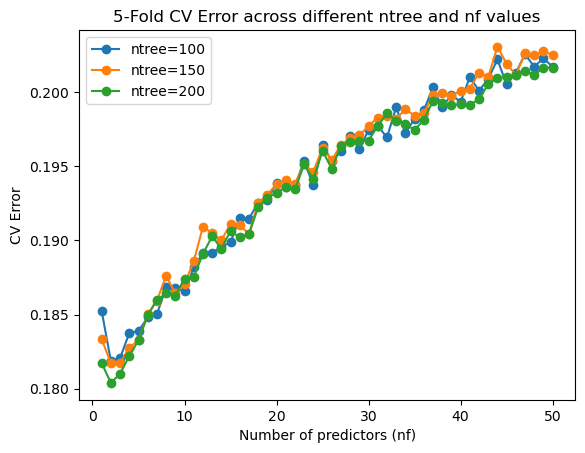

Best ntree: 200
Best nf: 2
Best CV Error: 0.18038304885214984


In [33]:
# train data
X = train.drop('group', axis=1)
y = train['group']

np.random.seed(7)

# cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=7)

# explore different trees num and different nums of features
ntree_range = [100, 150, 200] # set the num of tree
best_ntree = None
best_nf = None
best_cv_error = np.inf  

# for each ntree
for ntree in ntree_range:
    # explore different features
    nf_range = range(1, int(X.shape[1] / 2) + 1)  # 1 ~ half of all features/2
    nf_errors = []

    for nf in nf_range:
        model = RandomForestClassifier(n_estimators=ntree, max_features=nf, random_state=7)
        cv_err = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
        nf_errors.append(1 - np.mean(cv_err))

    # find the minus error
    min_nf_error = min(nf_errors)
    if min_nf_error < best_cv_error:
        best_cv_error = min_nf_error
        best_nf = nf_range[np.argmin(nf_errors)]
        best_ntree = ntree

    # plot the nf of different ntree
    plt.plot(nf_range, nf_errors, marker='o', linestyle='-', label=f'ntree={ntree}')

# plot
plt.legend()
plt.xlabel('Number of predictors (nf)')
plt.ylabel('CV Error')
plt.title('5-Fold CV Error across different ntree and nf values')
plt.show()

print("Best ntree:", best_ntree)
print("Best nf:", best_nf)
print("Best CV Error:", best_cv_error)

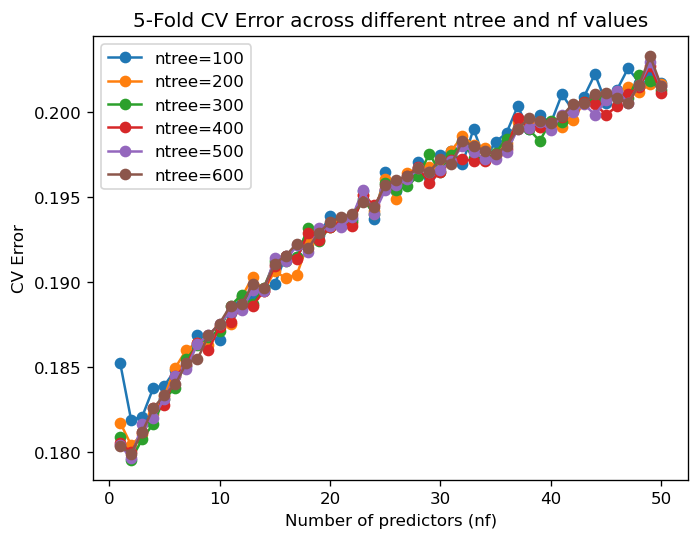

Best ntree: 300
Best nf: 2
Best CV Error: 0.17954045081854064


In [37]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# train data 
X = train.drop('group', axis=1)
y = train['group']

np.random.seed(7)

# cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=7)

# explore different trees num and different nums of features
ntree_range = [100, 200, 300, 400, 500, 600]  # set the num of tree
best_ntree = None
best_nf = None
best_cv_error = np.inf  

plt.figure(dpi=120)  

# for each ntree
for ntree in ntree_range:
    nf_range = range(1, int(X.shape[1] / 2) + 1)  # 1 ~ half of all features/2
    nf_errors = []

    for nf in nf_range:
        model = RandomForestClassifier(n_estimators=ntree, max_features=nf, random_state=7)
        cv_err = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
        nf_errors.append(1 - np.mean(cv_err))

    min_nf_error = min(nf_errors)
    if min_nf_error < best_cv_error:
        best_cv_error = min_nf_error
        best_nf = nf_range[np.argmin(nf_errors)]
        best_ntree = ntree

    plt.plot(nf_range, nf_errors, marker='o', linestyle='-', label=f'ntree={ntree}')

plt.legend()
plt.xlabel('Number of predictors (nf)')
plt.ylabel('CV Error')
plt.title('5-Fold CV Error across different ntree and nf values')
plt.show()

print("Best ntree:", best_ntree)
print("Best nf:", best_nf)
print("Best CV Error:", best_cv_error)

Confusion Matrix:
[[495  12  34  28]
 [ 38 318  20  33]
 [ 83  29 173  50]
 [ 33  24  23 607]]
Accuracy on test set: 0.7965
Top 10 features based on importance:
1. feature 97 (0.031033612012729) - windows
2. feature 5 (0.03036147573673639) - car
3. feature 32 (0.029284125663242736) - god
4. feature 9 (0.028402424111906077) - christian
5. feature 33 (0.02118862319705596) - government
6. feature 88 (0.02037922735575626) - team
7. feature 46 (0.018523048142581024) - jews
8. feature 34 (0.01690690517154658) - graphics
9. feature 84 (0.01654756787323246) - space
10. feature 1 (0.016426226086631746) - baseball


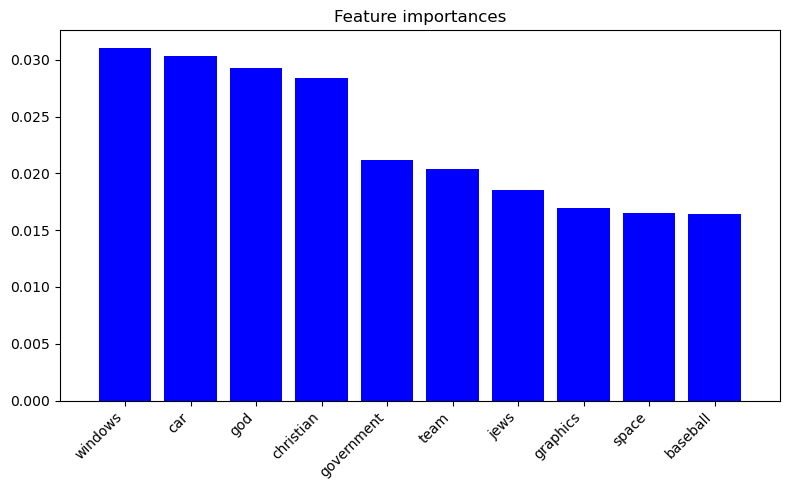

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# the test data
X_test = test.drop('group', axis=1)
y_test = test['group']

# choose the best parameters from the step before
best_ntree = 300
best_nf = 2

# fit the model
model = RandomForestClassifier(n_estimators=best_ntree, max_features=best_nf, random_state=7)
model.fit(X, y)  

# predict on the test data
y_pred = model.predict(X_test)

# calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# test the accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# get the most important features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Limit to top 10 features
top_n = 10
indices_top = indices[:top_n]
importances_top = importances[indices_top]

print("Top 10 features based on importance:")
for i in range(top_n):
    print(f"{i+1}. feature {indices_top[i]} ({importances_top[i]}) - {X.columns[indices_top[i]]}")

# Visualization
plt.figure(figsize=(8, 5))
plt.title("Feature importances")
plt.bar(range(top_n), importances_top, color="b", align="center")
plt.xticks(range(top_n), X.columns[indices_top], rotation=45, ha='right')
plt.xlim([-1, top_n])
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

### 2. Build a boosting tree for this dataset and report the 5-fold cross validation value of the misclassification error. 
Similarly, report the best CV error, the corresponding confusion matrix and tuning parameters.

Best parameters found by grid search:  
learning_rate: 0.1  
max_depth: 3  
n_estimators: 300  
Best CV accuracy: 0.7814980206111164  
Best CV misclassification error: 0.2185019793888836  

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
import numpy as np

In [46]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import confusion_matrix

# Set features and labels
X1 = data.drop('group', axis=1)
y1 = data['group']

# set the parameters 
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# initialize
gb_clf = GradientBoostingClassifier(random_state=7)

# set the search grid
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# excute
grid_search.fit(X1, y1)

# the best params and scores
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_

print("Best parameters found by grid search:")
for param_name in best_params:
    print(f"{param_name}: {best_params[param_name]}")

print("Best CV accuracy:", best_cv_score)
best_cv_error = 1 - best_cv_score
print("Best CV misclassification error:", best_cv_error)

# initialize kf
kf = KFold(n_splits=5, shuffle=True, random_state=7)


for fold, (train_index, test_index) in enumerate(kf.split(X1), start=1):
    X_train_k, X_test_k = X1.iloc[train_index], X1.iloc[test_index]
    y_train_k, y_test_k = y1.iloc[train_index], y1.iloc[test_index]
    

    gb_clf.set_params(**best_params)
    gb_clf.fit(X_train_k, y_train_k)
    y_pred_k = gb_clf.predict(X_test_k)
    cm = confusion_matrix(y_test_k, y_pred_k)
    
    print(f"\nConfusion Matrix for fold {fold}:")
    print(cm)
    print(f"Parameters for fold {fold}: {best_params}")

Best parameters found by grid search:
learning_rate: 0.1
max_depth: 3
n_estimators: 300
Best CV accuracy: 0.7814980206111164
Best CV misclassification error: 0.2185019793888836

Confusion Matrix for fold 1:
[[812  10  40  35]
 [ 65 518  40  67]
 [140  20 319  65]
 [ 48  21  56 993]]
Parameters for fold 1: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

Confusion Matrix for fold 2:
[[847  18  63  34]
 [ 61 545  22  70]
 [108  29 336  86]
 [ 33  28  49 920]]
Parameters for fold 2: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

Confusion Matrix for fold 3:
[[840  11  39  40]
 [ 53 564  27  66]
 [104  25 314  69]
 [ 56  31  50 959]]
Parameters for fold 3: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

Confusion Matrix for fold 4:
[[ 809   16   39   38]
 [  66  537   29   67]
 [ 107   18  306   78]
 [  49   25   48 1016]]
Parameters for fold 4: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

Confusion Matrix for fold 5:
[[819  12  38  45

### 3. Compare the results from random forest and boosting trees.

Compare the results from random forest and boosting trees.   
The result from random forest is better than boosting, according to the Accuracy on the test set  
**Random forest**:  
Confusion Matrix:  
[[495  12  34  28]  
 [ 38 318  20  33]  
 [ 83  29 173  50]  
 [ 33  24  23 607]]  
Accuracy on test set: 0.7965  

**Boosting Trees**:  
[[819  12  38  45]  
 [ 51 563  35  73]  
 [104  25 339  65]  
 [ 43  25  47 964]]  
Parameters for fold 5: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

Best parameters found by grid search:  
learning_rate: 0.1  
max_depth: 3  
n_estimators: 300  
Best CV accuracy: 0.7814980206111164   
Best CV misclassification error: 0.2185019793888836  
 

### 4. Build a multi-class LDA classifier. Report the 5-fold CV error of misclassification.

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
import numpy as np

# Set features and labels
X1 = data.drop('group', axis=1)
y1 = data['group']

# initialize LDA 
lda = LinearDiscriminantAnalysis()

# 5-fold cross-validation and return the accuracy 
cv_scores = cross_val_score(lda, X1, y1, cv=5)

# calculate the accuracy 
mean_cv_accuracy = np.mean(cv_scores)
print("Mean CV accuracy:", mean_cv_accuracy)

# calculate the error
mean_cv_error = 1 - mean_cv_accuracy
print("Mean CV error of misclassification:", mean_cv_error)

Mean CV accuracy: 0.758162685904113
Mean CV error of misclassification: 0.24183731409588705


### 5. Build a multi-class QDA classifier. Report the 5-fold CV error of misclassification

In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.exceptions import ConvergenceWarning
import warnings

X1 = data.drop('group', axis=1)
y1 = data['group']

# transform the class into num
label_encoders = {}
for column in X1.columns:
    if X1[column].dtype.name == 'category' or X1[column].dtype == 'object':
        le = LabelEncoder()
        X1[column] = le.fit_transform(X1[column].astype(str))  
        label_encoders[column] = le

if X1.isnull().any().any():
    X1.fillna(X1.mean(), inplace=True)


qda = QuadraticDiscriminantAnalysis()
with warnings.catch_warnings():
    warnings.filterwarnings("error", category=ConvergenceWarning,
                            module="sklearn")

    try:
        cv_scores = cross_val_score(qda, X1, y1, cv=5)
        mean_cv_score = np.mean(cv_scores)
        print(f"Mean CV Accuracy: {mean_cv_score:.4f}")
    except ConvergenceWarning as e:
        print("QuadraticDiscriminantAnalysis failed to converge:", e)
    except Exception as e:
        print("An exception occurred:", e)

/Users/vivian/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/vivian/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/vivian/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/vivian/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/vivian/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Mean CV Accuracy: 0.6876


### 6. Train an SVM on the given dataset. Report the 5-fold CV error of misclassification.

In [62]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np


svm = SVC()
cv_scores = cross_val_score(svm, X1, y1, cv=5)
mean_cv_accuracy = np.mean(cv_scores)
print(f"Mean CV accuracy: {mean_cv_accuracy:.4f}")
mean_cv_error = 1 - mean_cv_accuracy
print(f"Mean CV error of misclassification: {mean_cv_error:.4f}")

Mean CV accuracy: 0.7768
Mean CV error of misclassification: 0.2232


In [64]:
1-0.6876

0.3124

### 7. Compare the performances of all above methods and give your comments.

<table>
    <tr>
        <th align="center"> </th>
        <th align="center">Random Forest</th>
        <th align="center">Boosting</th>
        <th align="center">LDA</th>
        <th align="center">QDA</th>
        <th align="center">SVM</th>
    </tr>
    <tr>
        <td align="center"><strong>CV errors</strong></td>
        <td align="center">0.2035</td>
        <td align="center">0.2185</td>
        <td align="center">0.2418</td>
        <td align="center">0.3124</td>
        <td align="center">0.2232</td>
    </tr>
    <tr>
        <td align="center"><strong>Accuracy</strong></td>
        <td align="center">0.7965</td>
        <td align="center">0.7815</td>
        <td align="center">0.7582</td>
        <td align="center">0.6876</td>
        <td align="center">0.7768</td>
    </tr>
</table>

So, for different prediction ways, Random Forest > Boosting > SVM > LDA > QDA

--------------------

# Problem 3. Spectral Clustering (PCA + K-means)on 20newsgroup Data 

In [86]:
X1 = data.drop('group', axis=1)
X2 = X1.copy()

# transform the class into num
label_encoders = {}
for column in X2.columns:
    if X1[column].dtype.name == 'category' or X2[column].dtype == 'object':
        le = LabelEncoder()
        X2[column] = le.fit_transform(X1[column].astype(str))  
        label_encoders[column] = le

In [88]:
X2_numpy = X2.to_numpy()

In [106]:
y2 = pd.Series(data['group'])

### 1. Implement the K-means clustering algorithm by yourself. Then use your algorithm for the next several steps.

In [134]:
import numpy as np
import pandas as pd

k = 4
np.random.seed(7) 

def K_means(X, k, max_iters=100, tol=1e-4):
    # Step 1: Randomly initialize cluster centroids
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    
    for iteration in range(max_iters):
        # Step 2: Assign data points to the nearest centroid
        clusters = {i: [] for i in range(k)}
        for x in X:
            distances = np.linalg.norm(x - centroids, axis=1)
            closest_centroid = np.argmin(distances)
            clusters[closest_centroid].append(x)
        
        # Step 3: Update centroids to the mean of points in each cluster
        new_centroids = np.zeros(centroids.shape)
        for i in range(k):
            if clusters[i]:  # Check if cluster i has any points
                new_centroids[i] = np.mean(clusters[i], axis=0)
            else:  # If a cluster is empty, reinitialize its centroid
                new_centroids[i] = X[np.random.choice(range(len(X)))]
        
        # Step 4: Check for convergence (if centroids do not change beyond the tolerance)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    
    return centroids, clusters

centroids, clusters = K_means(X2_numpy, k)
print("Centroids:\n", centroids)
for cluster_id, points in clusters.items():
    print(f"Cluster {cluster_id} has {len(points)} points")

Centroids:
 [[1.95977308e-02 7.22021661e-03 1.92882929e-01 4.12583806e-03
  9.79886539e-03 3.30067045e-02 1.28932439e-02 2.97060340e-01
  1.63486333e-01 3.06343476e-01 4.48684889e-02 3.22846828e-01
  4.74471377e-02 1.23775142e-02 3.14595152e-02 2.57864879e-03
  1.34089737e-02 2.57864879e-02 1.03145952e-03 3.66168128e-02
  6.70448685e-03 1.44404332e-01 5.93089221e-02 7.22021661e-03
  2.17637958e-01 4.73439917e-01 6.70448685e-03 2.21763796e-02
  4.28055699e-02 3.61010830e-03 3.09437855e-03 1.13460547e-02
  4.42496132e-01 2.37235688e-01 5.15729758e-04 6.44662197e-02
  3.86797318e-02 1.28932439e-01 3.50696235e-02 4.64156782e-03
  2.06291903e-03 2.16606498e-01 2.88808664e-02 1.85662713e-02
  8.97369778e-02 2.33109850e-01 1.72253739e-01 1.39247035e-02
  1.78958226e-01 1.18617844e-02 5.15729758e-03 1.54718927e-02
  5.67302733e-03 2.78494069e-02 1.65033522e-02 1.90820010e-02
  1.49561630e-02 2.57864879e-03 1.95977308e-02 5.15729758e-04
  8.66425993e-02 2.37235688e-02 1.18617844e-02 2.42392986e

### 2. Apply PCA on the binary occurrence matrix and apply K-means clustering.
Basically, take the top 4 left singular vectors of the occurrence matrix (of size 16242x100) and apply K-means on the rows of these singular vectors with K=4. Report the mis-clustering error rate and running time.

In [109]:
y2_transformed = y2.apply(lambda x: x - 1)
y2_transformed

0        0
1        0
2        0
3        0
4        0
        ..
16237    3
16238    3
16239    3
16240    3
16241    3
Name: group, Length: 16242, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [149]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import time



# 标准化数据
scaler = StandardScaler()
X_std = scaler.fit_transform(X2_numpy)

# 应用 SVD
svd = TruncatedSVD(n_components=4)
X_svd = svd.fit_transform(X_std)

start_time = time.time()


# 获取从聚类到实际标签的映射
def get_labels_from_clusters(clusters, X):
    labels = np.empty(len(X))
    for cluster_id, points in clusters.items():
        for point in points:
            index = np.where(np.all(X==point, axis=1))[0][0]
            labels[index] = cluster_id
    labels = labels.astype(int)
    return labels

# 运行 K-means
start_time = time.time()
centroids, clusters = K_means(X_svd, k=4)
end_time = time.time()

end_time = time.time()
# After obtaining the labels from k-means
labels = get_labels_from_clusters(clusters, X_svd)

# Convert labels to int
labels = labels.astype(int)

# Ensure y2_transformed is also of type int
y2_transformed = y2_transformed.astype(int)

# Now you can compute the confusion matrix without encountering the error
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y2_transformed, labels)

# Continue with the linear sum assignment as before
from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
accuracy = conf_matrix[row_ind, col_ind].sum() / conf_matrix.sum()
error_rate = 1 - accuracy

# Printing results
print(f"Error Clustering Rate: {error_rate:.4f}")
print(f"Running Time: {end_time - start_time} seconds")



Error Clustering Rate: 0.5338
Running Time: 1.6460318565368652 seconds


### 3. Top 5 left singular vectors of the occurrence matrix and apply K-means on the rows of these singular vectors with K=4. 
Report the mis-clustering error rate and running time

In [150]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import time



# 标准化数据
scaler = StandardScaler()
X_std = scaler.fit_transform(X2_numpy)

# 应用 SVD
svd = TruncatedSVD(n_components=5)
X_svd = svd.fit_transform(X_std)

start_time = time.time()


# 获取从聚类到实际标签的映射
def get_labels_from_clusters(clusters, X):
    labels = np.empty(len(X))
    for cluster_id, points in clusters.items():
        for point in points:
            index = np.where(np.all(X==point, axis=1))[0][0]
            labels[index] = cluster_id
    labels = labels.astype(int)
    return labels

# 运行 K-means
start_time = time.time()
centroids, clusters = K_means(X_svd, k=4)
end_time = time.time()

end_time = time.time()
# After obtaining the labels from k-means
labels = get_labels_from_clusters(clusters, X_svd)

# Convert labels to int
labels = labels.astype(int)

# Ensure y2_transformed is also of type int
y2_transformed = y2_transformed.astype(int)

# Now you can compute the confusion matrix without encountering the error
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y2_transformed, labels)

# Continue with the linear sum assignment as before
from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
accuracy = conf_matrix[row_ind, col_ind].sum() / conf_matrix.sum()
error_rate = 1 - accuracy

# Printing results
print(f"Error Clustering Rate: {error_rate:.4f}")
print(f"Running Time: {end_time - start_time} seconds")



Error Clustering Rate: 0.5107
Running Time: 1.743823766708374 seconds


### 4. Compare with the performances from Problem 2.
(Note that the true cluster labels are already provided in the data. Using the truth and the results of K-means, you can compute the mis-clustering error rate.)

In this way, the error is large, more than 0.5. And I originally thought that the predicted classification and the real classification may not be directly corresponding, resulting in a large error. However, after testing and pairing, it was found that the error is still large. The error of using 5 singular vectors to do kmeans will be less than using 4 singular vectors to do kmeans, but the time will be relatively longer.

### 5.Visualize the two-dimensional or three-dimensional projection of the given data. Can you observe revealing cluster structure?

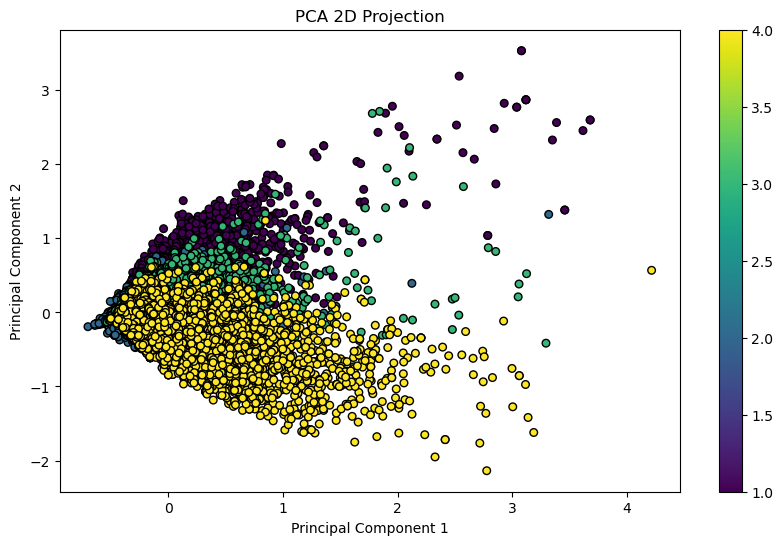

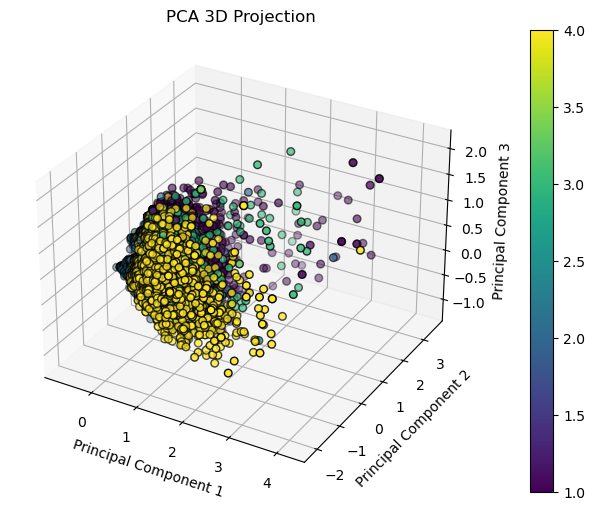

In [127]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA for 2D projection
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X2_numpy)

# Perform PCA for 3D projection
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X2_numpy)

# Plotting the 2D projection
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y1, cmap='viridis', edgecolor='k', s=30)
plt.title('PCA 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Plotting the 3D projection
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y1, cmap='viridis', edgecolor='k', s=30)
ax.set_title('PCA 3D Projection')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter)
plt.show()

---------------------

# Problem 4: Classification on MNIST Data

In [128]:
mnist_train = pd.read_csv("/Users/vivian/Documents/HKUST Data Driven Modeling/机器学习5054/Final/MNIST/train_resized.csv")
mnist_test = pd.read_csv("/Users/vivian/Documents/HKUST Data Driven Modeling/机器学习5054/Final/MNIST/test_resized.csv")

In [129]:
mnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144
0,2,0.0,0.0,0.072606,-0.360184,-6.625228,-3.997078,-5.531005,-1.731706,0.166274,...,0.000000,0.000000,0.000000,0.000075,0.015430,-0.189739,-0.185194,0.016683,0.000026,0.0
1,1,0.0,0.0,0.000000,0.001739,0.313278,-3.799580,-6.506716,0.240206,0.010433,...,0.000000,0.010356,-0.087299,-2.982227,-0.779243,0.061083,0.000609,0.000000,0.000000,0.0
2,1,0.0,0.0,0.000000,0.045693,-0.252522,-6.744340,-0.851903,0.112032,0.000000,...,0.000000,0.000000,0.168599,-1.623264,-4.564190,0.095272,0.009263,0.000000,0.000000,0.0
3,5,0.0,0.0,0.000000,0.091467,-0.728588,-6.229659,-1.798628,0.033384,-0.630858,...,0.011929,-0.137988,-0.420487,-0.096168,0.009753,0.000000,0.000000,0.000000,0.000000,0.0
4,3,0.0,0.0,0.000000,0.000862,0.170443,-1.632121,-9.145603,-5.091849,0.222623,...,-0.155082,-1.367886,-4.408230,-2.914262,0.112931,0.010156,0.000000,0.000000,0.000000,0.0


### 1. Use only the digit images of 3 and 6 from train resized.csv and test resized.csv to build an SVM classifier for binary classification. 
More specifically, use a linear kernel and choose the best cost (the data size is large so a large cost value is suitable) parameter (called budget in our course) by 5 fold cross validation. Apply your model on the test data and report the misclassification error, confusion matrix. Also report the time cost of training your model

In [152]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import time

# choose the label = 3 or 6
train_data = mnist_train[(mnist_train['label'] == 3) | (mnist_train['label'] == 6)]
test_data = mnist_test[(mnist_test['label'] == 3) | (mnist_test['label'] == 6)]
# Divide features and labels
X_train = train_data.iloc[:, 1:]
y_train = train_data['label']
X_test = test_data.iloc[:, 1:]
y_test = test_data['label']

# Initialize SVM classifier
svc = svm.SVC(kernel='linear')
# choose the cost range 
param_grid = {'C': [1e-7,1e-6,1e-5,1e-4,1e-3,0.01,0.1,1,10]} # tune the cost as budget

# Grid search using 5-fold cross validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
# record the traing time
start_time = time.time()

# train the model
grid_search.fit(X_train, y_train)

# record the end time
end_time = time.time()

# predict on the test data
y_pred = grid_search.predict(X_test)

# report the error
misclassification_error = 1 - grid_search.score(X_test, y_test)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Best Cost Parameter: {grid_search.best_params_['C']}")
print(f"Misclassification Error: {misclassification_error}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Training Time Cost: {end_time - start_time} seconds")
print(classification_report(y_test, y_pred))

Best Cost Parameter: 1e-05
Misclassification Error: 0.005280259951259136
Confusion Matrix:
[[1254    8]
 [   5 1195]]
Training Time Cost: 3.422332763671875 seconds
              precision    recall  f1-score   support

           3       1.00      0.99      0.99      1262
           6       0.99      1.00      0.99      1200

    accuracy                           0.99      2462
   macro avg       0.99      0.99      0.99      2462
weighted avg       0.99      0.99      0.99      2462



### 2. Use only the digit images of 3 and 6 from train resized.csv and test resized.csv to build an SVM classifier for binary classification. 
More specifically, use a radial kernel and choose the best cost parameter, gamma parameter by 5 fold cross validation. Apply your model on the test data and report the misclassification error, confusion matrix. Also report the time cost of training your model.

In [153]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import time

# choose the label = 3 or 6
train_data = mnist_train[(mnist_train['label'] == 3) | (mnist_train['label'] == 6)]
test_data = mnist_test[(mnist_test['label'] == 3) | (mnist_test['label'] == 6)]

# Split the data into features and labels
X_train = train_data.iloc[:, 1:]
y_train = train_data['label']
X_test = test_data.iloc[:, 1:]
y_test = test_data['label']

# Initialize SVM classifier with RBF kernel
svc = svm.SVC(kernel='rbf')

# Set the range of parameters for cost and gamma
param_grid = {
    'C':[1e-7,1e-6,1e-5,1e-4,1e-3,0.01,0.1,1,10],  
    'gamma': ['scale', 'auto', 0.001, 0.0001]  
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')

# Record the start time
start_time = time.time()

# Train the model
grid_search.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Predict on the test data
y_pred = grid_search.predict(X_test)

# Report the misclassification error
misclassification_error = 1 - grid_search.score(X_test, y_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Misclassification Error: {misclassification_error}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Training Time Cost: {end_time - start_time} seconds")


Best Parameters: {'C': 1, 'gamma': 'scale'}
Misclassification Error: 0.002030869212022779
Confusion Matrix:
[[1258    4]
 [   1 1199]]
Training Time Cost: 285.5539309978485 seconds


### 3. Compare the results of the above two models and report your comments

Using linear kernel is much faster than radial, but the error of radial kernel is much smaller than linear kernel.  However, because it was not clear how to set the range of C at the beginning, we set more settings. Later, we can narrow the optimal value range of C, thereby optimizing the time.  
**linear kernel**  
Best Cost Parameter: 1e-05  
Misclassification Error: 0.005280259951259136  
Confusion Matrix:  
[[1254    8]  
 [   5 1195]]  
Training Time Cost: 3.422332763671875 seconds

**radial kernel**
Best Parameters: {'C': 1, 'gamma': 'scale'}  
Misclassification Error: 0.002030869212022779  
Confusion Matrix:  
[[1258    4]  
 [   1 1199]]  
Training Time Cost: 285.5539309978485 seconds  

### 4. Use only the digit images of 1,2,5 and 8 from train resized.csv and test resized.csv to build an SVM classifier for multi-class classification. 
More specifically, use a linear kernel and choose the best cost parameter (called budget in our course) by 5 fold cross validation. Apply your model on the test data and report the misclassification error, confusion matrix. Also report the time cost of training your model.

In [155]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
import time

# Filter the data for digits 1, 2, 5, and 8
train_data = mnist_train[mnist_train['label'].isin([1, 2, 5, 8])]
test_data = mnist_test[mnist_test['label'].isin([1, 2, 5, 8])]

# Split the data into features and labels
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# Set up the parameter grid for C values
param_grid = {'C': [1e-6,1e-5,1e-4,1e-3,0.01]}


# Initialize the SVM classifier with a linear kernel
svm_clf = SVC(kernel='linear')

# Set up GridSearchCV to find the best C value using 5-fold CV
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Start timing
start_time = time.time()

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# End timing
end_time = time.time()

# The best parameter and score from the grid search
best_param = grid_search.best_params_
best_cv_score = grid_search.best_score_
print("Best parameter (C):", best_param)
print("Best CV accuracy:", best_cv_score)

# Misclassification error is 1 - accuracy
best_cv_error = 1 - best_cv_score
print("Best CV misclassification error:", best_cv_error)

# Time cost of training the model
time_cost = end_time - start_time
print("Training time cost:", time_cost, "seconds")

# Train the model with the best parameter on the entire training set
svm_clf_best = SVC(kernel='linear', C=best_param['C'])
svm_clf_best.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_clf_best.predict(X_test)

# Calculate the misclassification error
misclassification_error = 1 - (y_pred == y_test).mean()
print("Misclassification error on test data:", misclassification_error)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix on test data:\n", conf_matrix)

Best parameter (C): {'C': 1e-05}
Best CV accuracy: 0.9628142668841321
Best CV misclassification error: 0.037185733115867925
Training time cost: 89.87556505203247 seconds
Misclassification error on test data: 0.046608406158968
Confusion matrix on test data:
 [[1343   11    1    8]
 [   9 1129   25   22]
 [  15   16 1063   32]
 [  22   18   45 1047]]


### 5. Use the complete dataset of train resized.csv and test resized.csv to build an SVM classifier for classifying all 10 classes. 
You can use any SVM model and tune the parameters by yourself. Report the best test performance (misclassification error) you can get, the model you used and the time cost of training your model.

Best parameters found: {'C': 10, 'gamma': 1e-05}  
Best cross-validation accuracy: 0.9761666666666667  
Best cross-validation misclassification error: 0.023833333333333262  
Training time cost: 806.463231086731 seconds  
Misclassification error on test data: 0.02024999999999999  

In [161]:
# the first try of parameters 


# import pandas as pd
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# import time


# # Split the data into features and labels
# X_train = mnist_train.drop('label', axis=1)
# y_train = mnist_train['label']
# X_test = mnist_test.drop('label', axis=1)
# y_test = mnist_test['label']

# # Choose SVM model and parameters for tuning
# svm_model = SVC(kernel='rbf')
# parameter_space = {
#     'C': [1e-5, 1e-4],  
#     'gamma': [0.001, 0.01, 0.1]  
# }

# # Create a GridSearchCV instance
# grid_search = GridSearchCV(svm_model, parameter_space, cv=3, scoring='accuracy', verbose=2)

# # Measure time to train the model
# start_time = time.time()

# # Perform the grid search
# grid_search.fit(X_train, y_train)

# end_time = time.time()

# # Best parameter and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Output the best parameters and the best score
# print('Best parameters found:', best_params)
# print('Best cross-validation accuracy:', best_score)

# # Misclassification error is 1 - accuracy
# best_cv_error = 1 - best_score
# print('Best cross-validation misclassification error:', best_cv_error)

# # Training time
# training_time = end_time - start_time
# print('Training time cost:', training_time, 'seconds')

# # Evaluate on the test set with the best model
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)

# # Test misclassification error
# test_error = 1 - test_accuracy
# print('Misclassification error on test data:', test_error)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...............................C=1e-05, gamma=0.001; total time= 1.0min
[CV] END ...............................C=1e-05, gamma=0.001; total time= 1.0min
[CV] END ...............................C=1e-05, gamma=0.001; total time= 1.0min
[CV] END ................................C=1e-05, gamma=0.01; total time=  50.2s
[CV] END ................................C=1e-05, gamma=0.01; total time=  50.1s
[CV] END ................................C=1e-05, gamma=0.01; total time=  49.9s
[CV] END .................................C=1e-05, gamma=0.1; total time=  50.5s
[CV] END .................................C=1e-05, gamma=0.1; total time=  49.9s
[CV] END .................................C=1e-05, gamma=0.1; total time=  50.9s
[CV] END ..............................C=0.0001, gamma=0.001; total time= 1.0min
[CV] END ..............................C=0.0001, gamma=0.001; total time= 1.0min
[CV] END ..............................C=0.0001, 

In [164]:
# the second try of parameters 
# import pandas as pd
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# import time


# # Split the data into features and labels
# X_train = mnist_train.drop('label', axis=1)
# y_train = mnist_train['label']
# X_test = mnist_test.drop('label', axis=1)
# y_test = mnist_test['label']

# # Choose SVM model and parameters for tuning
# svm_model = SVC(kernel='rbf')
# parameter_space = {
#     'C': [1e-6,1e-5],  
#     'gamma': [1e-5,0.0001]
# }

# # Create a GridSearchCV instance
# grid_search = GridSearchCV(svm_model, parameter_space, cv=3, scoring='accuracy', verbose=2)

# # Measure time to train the model
# start_time = time.time()

# # Perform the grid search
# grid_search.fit(X_train, y_train)

# end_time = time.time()

# # Best parameter and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Output the best parameters and the best score
# print('Best parameters found:', best_params)
# print('Best cross-validation accuracy:', best_score)

# # Misclassification error is 1 - accuracy
# best_cv_error = 1 - best_score
# print('Best cross-validation misclassification error:', best_cv_error)

# # Training time
# training_time = end_time - start_time
# print('Training time cost:', training_time, 'seconds')

# # Evaluate on the test set with the best model
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)

# # Test misclassification error
# test_error = 1 - test_accuracy
# print('Misclassification error on test data:', test_error)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............................C=1e-06, gamma=1e-05; total time=  59.8s
[CV] END ...............................C=1e-06, gamma=1e-05; total time=  59.4s
[CV] END ...............................C=1e-06, gamma=1e-05; total time=  59.4s
[CV] END ..............................C=1e-06, gamma=0.0001; total time=  58.5s
[CV] END ..............................C=1e-06, gamma=0.0001; total time=  58.9s
[CV] END ..............................C=1e-06, gamma=0.0001; total time=  58.3s
[CV] END ...............................C=1e-05, gamma=1e-05; total time=  59.6s
[CV] END ...............................C=1e-05, gamma=1e-05; total time=  59.8s
[CV] END ...............................C=1e-05, gamma=1e-05; total time=  59.4s
[CV] END ..............................C=1e-05, gamma=0.0001; total time=  58.8s
[CV] END ..............................C=1e-05, gamma=0.0001; total time=  58.4s
[CV] END ..............................C=1e-05, g

In [165]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time


# Split the data into features and labels
X_train = mnist_train.drop('label', axis=1)
y_train = mnist_train['label']
X_test = mnist_test.drop('label', axis=1)
y_test = mnist_test['label']

# Choose SVM model and parameters for tuning
svm_model = SVC(kernel='rbf')
parameter_space = {
    'C': [1,10,100],  
    'gamma': [1e-5,0.0001]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(svm_model, parameter_space, cv=3, scoring='accuracy', verbose=2)

# Measure time to train the model
start_time = time.time()

# Perform the grid search
grid_search.fit(X_train, y_train)

end_time = time.time()

# Best parameter and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Output the best parameters and the best score
print('Best parameters found:', best_params)
print('Best cross-validation accuracy:', best_score)

# Misclassification error is 1 - accuracy
best_cv_error = 1 - best_score
print('Best cross-validation misclassification error:', best_cv_error)

# Training time
training_time = end_time - start_time
print('Training time cost:', training_time, 'seconds')

# Evaluate on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Test misclassification error
test_error = 1 - test_accuracy
print('Misclassification error on test data:', test_error)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...................................C=1, gamma=1e-05; total time=  23.4s
[CV] END ...................................C=1, gamma=1e-05; total time=  23.0s
[CV] END ...................................C=1, gamma=1e-05; total time=  22.9s
[CV] END ..................................C=1, gamma=0.0001; total time= 1.1min
[CV] END ..................................C=1, gamma=0.0001; total time= 1.1min
[CV] END ..................................C=1, gamma=0.0001; total time= 1.1min
[CV] END ..................................C=10, gamma=1e-05; total time=  23.3s
[CV] END ..................................C=10, gamma=1e-05; total time=  22.8s
[CV] END ..................................C=10, gamma=1e-05; total time=  22.8s
[CV] END .................................C=10, gamma=0.0001; total time= 1.0min
[CV] END .................................C=10, gamma=0.0001; total time= 1.1min
[CV] END .................................C=10, g

------------------

# Problem 5: Deep learning on MNIST Data

### 1. Train a convolution neural network and tune the parameters for the best performance. 
Report the test error, running time, and model details.

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import time

# Load the data
train_df = pd.read_csv("/Users/vivian/Documents/HKUST Data Driven Modeling/机器学习5054/Final/MNIST/train_resized.csv")
test_df = pd.read_csv("/Users/vivian/Documents/HKUST Data Driven Modeling/机器学习5054/Final/MNIST/test_resized.csv")

In [62]:
# Prepare the data
X_train = train_df.iloc[:, 1:].values.reshape(-1, 1, 12, 12).astype('float32') / 255.0
X_test = test_df.iloc[:, 1:].values.reshape(-1, 1, 12, 12).astype('float32') / 255.0
y_train = train_df.iloc[:, 0].values
y_test = test_df.iloc[:, 0].values

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30000, 1, 12, 12)
(12000, 1, 12, 12)
(30000,)
(12000,)


In [64]:
X_train[11].shape

(1, 12, 12)

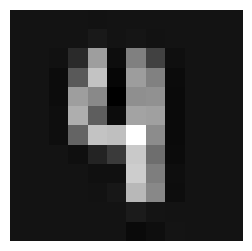

In [65]:
import matplotlib.pyplot as plt
row_index = 11
image = X_train[row_index]
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111)
ax.imshow(image.squeeze(), cmap='gray')
ax.axis('off')
ax.set_aspect('auto')
plt.show()

In [70]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# # X_train, X_test (30000, 12, 12, 1), (12000, 12, 12, 1)
# # y_train, y_test (30000,), (12000,)
# X_train = np.random.rand(30000, 12, 12, 1).astype(np.float32)
# X_test = np.random.rand(12000, 12, 12, 1).astype(np.float32)
# y_train = np.random.randint(0, 10, 30000)
# y_test = np.random.randint(0, 10, 12000)

# # Reshape the data to (batch_size, channels, height, width)
# X_train = X_train.reshape(-1, 1, 12, 12)
# X_test = X_test.reshape(-1, 1, 12, 12)

# Convert the NumPy arrays to PyTorch Tensors
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train).long()
y_test_tensor = torch.from_numpy(y_test).long()

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Neural network model definition
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 3 * 3, 128)  # The output from conv2 is 3x3
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 3 * 3)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

num_classes = 10  
model = Net(num_classes=num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Model details:")
print(model)

# Training loop
num_epochs = 20
start_time = time.time()  # Start time for training

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

end_time = time.time()  # End time for training
training_time = end_time - start_time
print(f'Finished Training, took {training_time:.2f} seconds')


print('Finished Training')

# Evaluation
correct = 0
total = 0
start_time = time.time()  # Start time for testing
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

end_time = time.time()  # End time for testing
testing_time = end_time - start_time

accuracy = 100 * correct / total
test_error = 100 - accuracy
print(f'Accuracy of the network on the test images: {accuracy:.2f}%')
print(f'Test Error: {test_error:.2f}%')
print(f'Testing took {testing_time:.2f} seconds')


Model details:
Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=576, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
Epoch 1, Loss: 0.6511386315239237
Epoch 2, Loss: 0.16573416557400786
Epoch 3, Loss: 0.11344189085066318
Epoch 4, Loss: 0.08693766949817221
Epoch 5, Loss: 0.07246367083664271
Epoch 6, Loss: 0.06475880155934298
Epoch 7, Loss: 0.05699449293711718
Epoch 8, Loss: 0.0510555427273775
Epoch 9, Loss: 0.0467134255004373
Epoch 10, Loss: 0.04122485944486045
Epoch 11, Loss: 0.036223317363715556
Epoch 12, Loss: 0.03361487406246522
Epoch 13, Loss: 0.029889419006104482
Epoch 14, Loss: 0.02871450593675229
Epoch 15, Loss: 0.026636256744213244
Epoch 16, Loss: 0.022594052057297146
Epoch 17, Loss: 0.023059849450463785
Epoch 18, Lo

### 2. Train an Auto-Encoder on the combined dataset (train+test) and visualize their two-dimensional representation. Report the results and model details.

In [71]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(12*12, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 2)  # 二维表示
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 12*12),
            nn.Sigmoid()  # 输出像素值在[0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [72]:
X_combined = torch.cat((X_train_tensor, X_test_tensor), 0)
y_combined = torch.cat((y_train_tensor, y_test_tensor), 0)

# 将数据集转换为二维形式，因为我们的Auto-Encoder期望的输入是二维的
X_combined = X_combined.view(-1, 12*12)

# 创建数据加载器
combined_dataset = TensorDataset(X_combined, y_combined)
combined_loader = DataLoader(combined_dataset, batch_size=batch_size, shuffle=True)

In [76]:
X_combined.shape, y_combined.shape

(torch.Size([42000, 144]), torch.Size([42000]))

In [77]:
# 初始化模型
autoencoder = Autoencoder()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# 训练模型
num_epochs = 50
for epoch in range(num_epochs):
    for data in combined_loader:
        inputs, _ = data  
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/50], Loss: 0.0300
Epoch [2/50], Loss: 0.0276
Epoch [3/50], Loss: 0.0271
Epoch [4/50], Loss: 0.0224
Epoch [5/50], Loss: 0.0194
Epoch [6/50], Loss: 0.0227
Epoch [7/50], Loss: 0.0235
Epoch [8/50], Loss: 0.0235
Epoch [9/50], Loss: 0.0175
Epoch [10/50], Loss: 0.0196
Epoch [11/50], Loss: 0.0199
Epoch [12/50], Loss: 0.0208
Epoch [13/50], Loss: 0.0204
Epoch [14/50], Loss: 0.0220
Epoch [15/50], Loss: 0.0202
Epoch [16/50], Loss: 0.0172
Epoch [17/50], Loss: 0.0266
Epoch [18/50], Loss: 0.0164
Epoch [19/50], Loss: 0.0175
Epoch [20/50], Loss: 0.0241
Epoch [21/50], Loss: 0.0168
Epoch [22/50], Loss: 0.0220
Epoch [23/50], Loss: 0.0172
Epoch [24/50], Loss: 0.0183
Epoch [25/50], Loss: 0.0224
Epoch [26/50], Loss: 0.0143
Epoch [27/50], Loss: 0.0179
Epoch [28/50], Loss: 0.0222
Epoch [29/50], Loss: 0.0210
Epoch [30/50], Loss: 0.0189
Epoch [31/50], Loss: 0.0130
Epoch [32/50], Loss: 0.0173
Epoch [33/50], Loss: 0.0195
Epoch [34/50], Loss: 0.0163
Epoch [35/50], Loss: 0.0185
Epoch [36/50], Loss: 0.0164
E

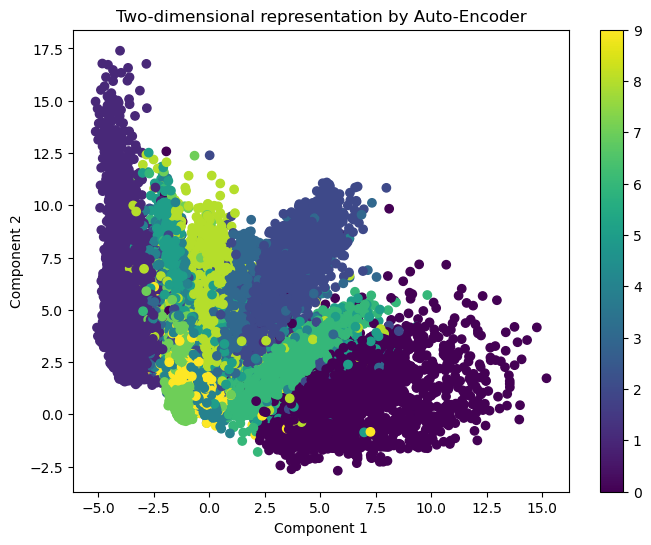

In [78]:
import matplotlib.pyplot as plt

autoencoder.eval()
with torch.no_grad():
    encoded_data = autoencoder.encoder(X_combined).numpy()

# visualization
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=y_combined, cmap='viridis')
plt.colorbar()
plt.title('Two-dimensional representation by Auto-Encoder')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [79]:
print(autoencoder)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=144, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): ReLU()
    (6): Linear(in_features=12, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=144, bias=True)
    (7): Sigmoid()
  )
)
